---
title: Práctica N°1
author: Boero Martina, Garcia Justo
date: 2024-03-08
description: Ejercicios correspondientes a la práctica N°1 de Modelado de Sistemas Biológicos
format:
  # html:
  #   code-fold: false
  pdf:
    toc: true
    number-sections: true
    colorlinks: true
---

# TP N°1
En 1838 Verhulst derivó una ecuación para describir el crecimiento auto-limitado de una población biológica. En 1920 Pearl redescubrió la ecuación por lo que ésta es llamada ecuación de Pearl-Verhulst. Dicha ecuación modela el crecimiento poblacional utilizando una tasa de reproducción proporcional a la población existente y a la cantidad de recursos disponibles. Se puede escribir como:
$$\frac{dB}{dP} = rP(1-\frac{P}{K})$$

Donde:
- P: representa el tamaño de la población.
- t: representa el tiempo.
- r: define la tasa de crecimiento.
- K: es la sustentabilidad del medio.

Implemento los algoritmos de aproximación de:
- Euler,
- Taylor de segundo orden,
- Runge-Kutta de segundo y cuarto orden.

y resuelva el modelo planteado por la ecuación para los pasos:
- $h=1~\text{mes}$
- $h=2~\text{mes}$
- $h=12~\text{mes}$

Utilizando los siguientes valores:
- $P(0)=10~\text{individuos}$
- $r=10\frac{1}{\text{año}}~\text{individuos}=\frac{10}{12}$
- $K=1000~\text{individuos}$

Grafique además la evolución del error instantáneo de cada aproximación respecto a la solución exacta de la ecuación diferencial.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
# Definimos la población en el instante 0
P_0 = 10.0

# Definimos la tasa de crecimiento
r = 10/12

# Definimos la sustentabilidad del medio
K = 1000.0

# Definimos los distintos pasos que pide la consigna
hs = [1, 2, 12]

## Ecuación de Pearl-Verhulst
$$\frac{dB}{dP} = rP(1-\frac{P}{K})$$
$$~$$
$$~$$

$$\text{Solución analítica: }  \frac{KP(t_0)e^{rt}}{K+P(t_0)e^{rt-1}}$$


In [ ]:
def P_analitica(t, K, r, P_0):
  return (K * P_0 * pow(np.e, r * t)) / (K + P_0 * ( pow(np.e, r*t)-1))

In [ ]:
print(P_analitica(0, K, r, P_0))

10.0


In [ ]:
ts = np.arange(0, 60, 0.01)
ys_analitica = []
for t in ts:
  ys_analitica.append(P_analitica(t, K, r, P_0))

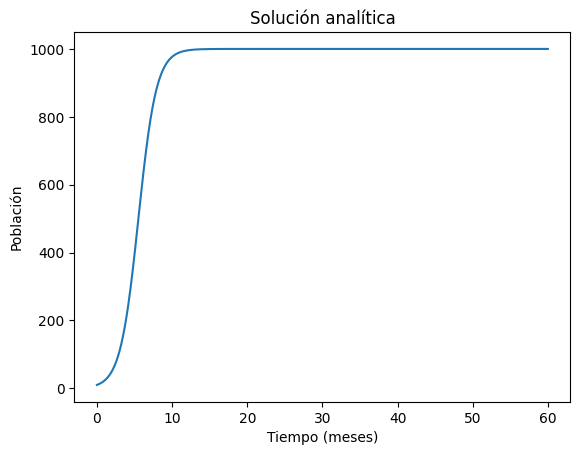

In [ ]:
plt.plot(ts, ys_analitica)
plt.title("Solución analítica")
plt.ylabel("Población")
plt.xlabel("Tiempo (meses)")
plt.show()

### Aproximación por Euler
Nos quedamos con los primeros terminos de la serie de Taylor.

$$t_{k+1} = t_k + h$$
$$~$$
$$y(t_{k+1})=y_{k}+hf(t_k, y_k)$$

Suele ser impreciso pero si se usa un paso suficientemente pequeño puede obtenerse una precision deseada.

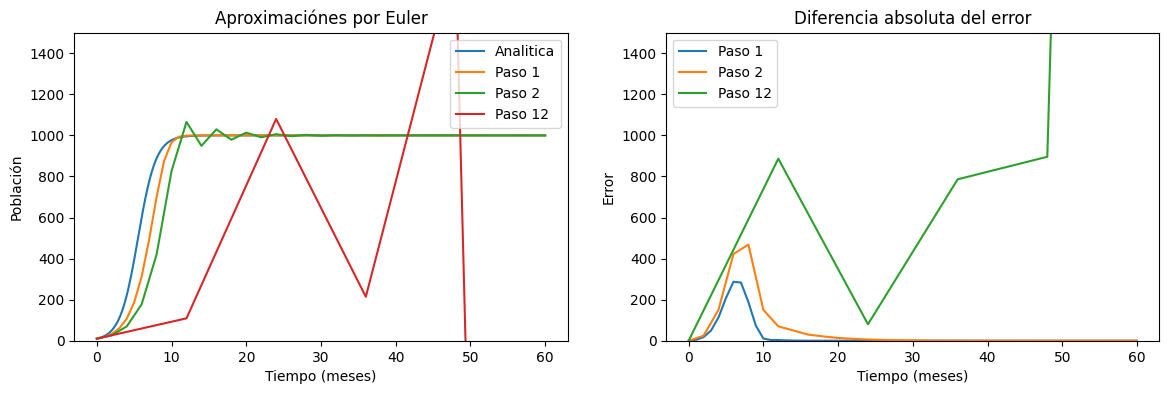

In [ ]:
def pearl_verhulst(r, K, P):
  return r * P * ( 1 - (P / K))


def euler(df, P_0, h, tf, r, K):
  errores = [0]
  ps = [P_0]
  ts = np.arange(0, tf+h, h)
  # print(ts)
  for i in range(len(ts)-1):
    pk = ps[i]
    ps.append(pk + (h * pearl_verhulst(r, K, pk)))
    errores.append(np.abs(P_analitica(ts[i+1], K, r, P_0) - ps[-1]))

  return ts, ps, errores

# xs, ys = euler(pearl_verhulst, 10, 1, 60, 1/12, 1000)
hs = [1, 2, 12]
labels = ["Paso 1", "Paso 2", "Paso 12"]
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.plot(ts, ys_analitica, label="Analitica")
graf_errores = []
errores = {}
for h, label in zip(hs, labels):
  xs, ys, error = euler(pearl_verhulst, 10, h, 60, 10/12, 1000)
  graf_errores.append((xs, error))
  errores[label] = np.sum(error)
  plt.plot(xs, ys, label=label)
  plt.legend()

plt.ylim(0, 1500)
plt.title("Aproximaciónes por Euler")
plt.ylabel("Población")
plt.xlabel("Tiempo (meses)")

plt.subplot(1, 2, 2)
plt.title("Diferencia absoluta del error")
for i, j in zip(graf_errores, labels):
  plt.plot(i[0], i[1], label=j)

plt.ylim(0, 1500)
plt.ylabel("Error")
plt.xlabel("Tiempo (meses)")
plt.legend()
plt.show()


In [ ]:
errores

{'Paso 1': 1245.88970992909,
 'Paso 2': 1427.6015996028777,
 'Paso 12': 18739.312412037812}

### Método de Taylor
Lo obtenemos si retenemos tres términos de la serie de Taylor. Es de segundo orden y proporciona resultados mejores que el método de Euler.

Podría aumentar su complejidad por la resolución de las derivadas pearciales si $f$ es muy compleja.

$$y(t+h)=y(t)+hf(t, y(t))+\frac{h^2}{2}f'(t. y(t))$$

In [ ]:
def derivada_segunda(r, K, P):
  return r*r*(1-2*P/K)*(P-P*P/K)

def taylor_2do_orden(df, P_0, h, tf, r, K):
  errores = [0]
  ps = [P_0]
  ts = np.arange(0, tf+h, h)

  for i in range(len(ts)-1):
    pk = ps[i]
    ps.append(pk + (h * df(r, K, pk)) + h*h/2 * derivada_segunda(r, K, pk))
    errores.append(np.abs(P_analitica(ts[i+1], K, r, P_0) - ps[-1]))

  return ts, ps, errores

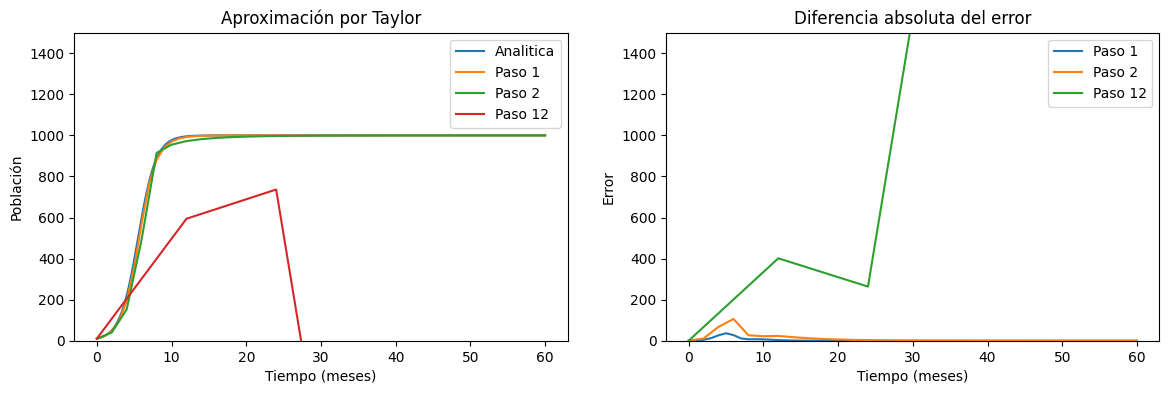

In [ ]:
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.plot(ts, ys_analitica, label="Analitica")
graf_errores = []
for h, label in zip(hs, labels):
  xs, ys, error = taylor_2do_orden(pearl_verhulst, 10, h, 60, 10/12, 1000)
  graf_errores.append((xs, error))
  errores[label] = np.sum(error)
  plt.plot(xs, ys, label=label)
  plt.legend()

plt.ylim(0, 1500)
plt.title("Aproximación por Taylor")
plt.ylabel("Población")
plt.xlabel("Tiempo (meses)")

plt.subplot(1, 2, 2)
plt.title("Diferencia absoluta del error")
for i, j in zip(graf_errores, labels):
  plt.plot(i[0], i[1], label=j)

plt.ylim(0, 1500)
plt.ylabel("Error")
plt.xlabel("Tiempo (meses)")
plt.legend()
plt.show()

In [ ]:
errores

{'Paso 1': 153.2658462094363,
 'Paso 2': 315.1141602362766,
 'Paso 12': 274024363918412.22}

### Método de Runge-Kutta
#### Método de Segundo Orden

In [ ]:
def runge_kutta_2do_orden(df, P_0, h, tf, r, K):
  errores = [0]
  ps = [P_0]
  ts = np.arange(0, tf+h, h)

  for i in range(len(ts)-1):
    pk = ps[i]
    primer_pendiente = df(r, K, pk) * h
    solucion_tentativa = pk + primer_pendiente/2
    segunda_pendiente = df(r, K, solucion_tentativa) * h
    ps.append(pk + segunda_pendiente)
    errores.append(np.abs(P_analitica(ts[i+1], K, r, P_0) - ps[-1]))

  return ts, ps, errores

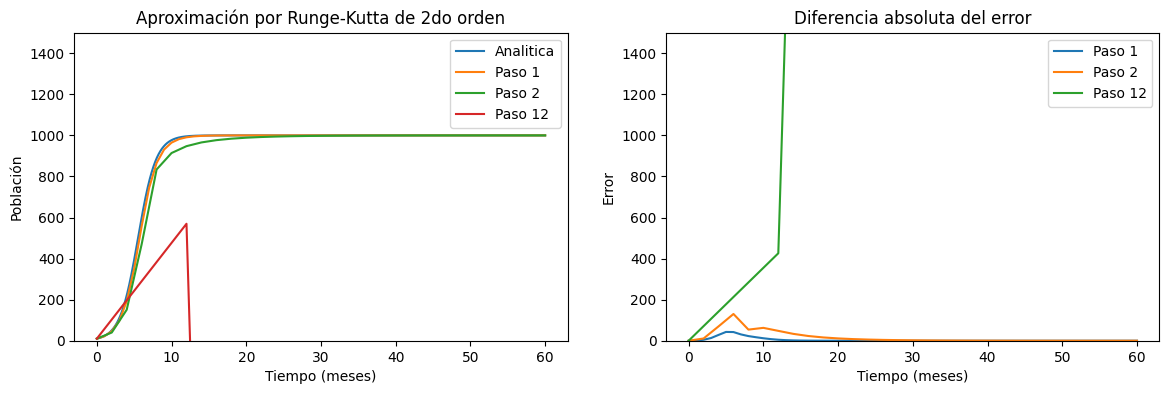

In [ ]:
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.plot(ts, ys_analitica, label="Analitica")
graf_errores = []
for h, label in zip(hs, labels):
  xs, ys, error = runge_kutta_2do_orden(pearl_verhulst, 10, h, 60, 10/12, 1000)
  graf_errores.append((xs, error))
  errores[label] = np.sum(error)
  plt.plot(xs, ys, label=label)
  plt.legend()


plt.ylim(0, 1500)
plt.title("Aproximación por Runge-Kutta de 2do orden")
plt.ylabel("Población")
plt.xlabel("Tiempo (meses)")

plt.subplot(1, 2, 2)
plt.title("Diferencia absoluta del error")
for i, j in zip(graf_errores, labels):
  plt.plot(i[0], i[1], label=j)

plt.ylim(0, 1500)
plt.ylabel("Error")
plt.xlabel("Tiempo (meses)")
plt.legend()
plt.show()

### Cuarto orden

In [ ]:
def runge_kutta_4to_orden(df, P_0, h, tf, r, K):
  errores = [0]
  ps = [P_0]
  ts = np.arange(0, tf+h, h)

  for i in range(len(ts)-1):
    pk = ps[i]

    #1.
    primer_pendiente = df(r, K, pk) * h
    solucion_tentativa1 = pk + primer_pendiente/2

    #2.
    segunda_pendiente = df(r, K, solucion_tentativa1) * h
    solucion_tentativa2 = pk + segunda_pendiente / 2

    #3.
    tercer_pendiente = df(r, K, solucion_tentativa2) * h
    solucion_tentativa3 = pk + tercer_pendiente

    #4.
    cuarta_pendiente = df(r, K, solucion_tentativa3) * h

    #5.
    pendiente = (primer_pendiente +
                 2 * segunda_pendiente +
                 2 * tercer_pendiente +
                 cuarta_pendiente) / 6

    ps.append(pk + pendiente)
    if h == 12:
      dic_pr = {
          "Primer pendiente" : primer_pendiente,
          "Solución tentativa 1" : solucion_tentativa1,
          "Segunda pendiente" : segunda_pendiente,
          "Solucion tentativa 2" :  solucion_tentativa2,
          "Tercer pendiente" : tercer_pendiente,
          "Solucion tentativa 3" : solucion_tentativa3,
          "Cuarta pendiente" : cuarta_pendiente
      }
      print(dic_pr)
      print(ps[-1])
    errores.append(np.abs(P_analitica(ts[i+1], K, r, P_0) - ps[-1]))

  return ts, ps, errores

{'Primer pendiente': 99.0, 'Solución tentativa 1': 59.5, 'Segunda pendiente': 559.5975, 'Solucion tentativa 2': 289.79875, 'Tercer pendiente': 2058.154344984375, 'Solucion tentativa 3': 2068.154344984375, 'Cuarta pendiente': -22091.080496933737}
-2782.762801160831
{'Primer pendiente': -105265.31608685304, 'Solución tentativa 1': -55415.42084458735, 'Segunda pendiente': -31262842.882273138, 'Solucion tentativa 2': -15634204.20393773, 'Tercer pendiente': -2444439752946.2817, 'Solucion tentativa 3': -2444439755729.0444, 'Cuarta pendiente': -5.975285721833111e+22}
-9.958809537203342e+21
{'Primer pendiente': -9.917788739829223e+41, 'Solución tentativa 1': -4.9588943699146116e+41, 'Segunda pendiente': -2.4590633371970833e+81, 'Solucion tentativa 2': -1.2295316685985416e+81, 'Tercer pendiente': -1.511748124086714e+160, 'Solucion tentativa 3': -1.511748124086714e+160, 'Cuarta pendiente': -inf}
-inf
{'Primer pendiente': -inf, 'Solución tentativa 1': -inf, 'Segunda pendiente': -inf, 'Solucion te

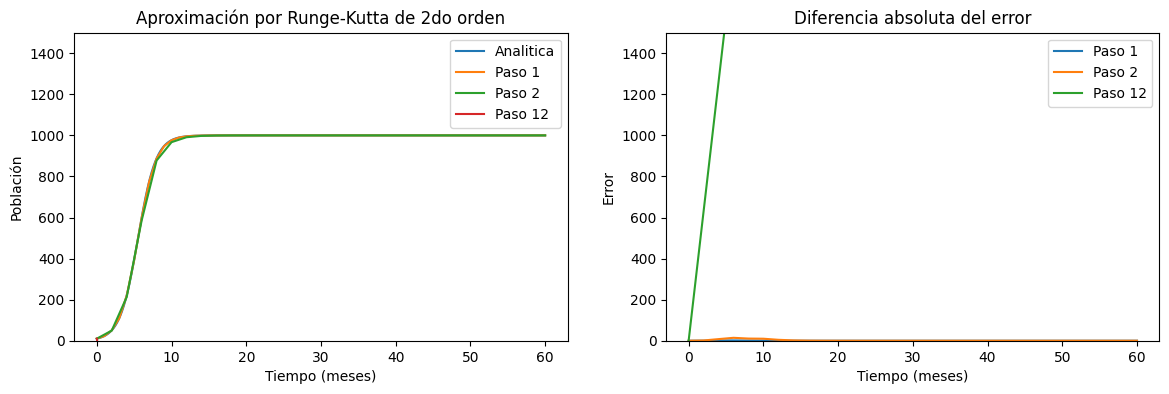

In [ ]:
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.plot(ts, ys_analitica, label="Analitica")
graf_errores = []
for h, label in zip(hs, labels):
  xs, ys, error = runge_kutta_4to_orden(pearl_verhulst, 10, h, 60, 10/12, 1000)
  graf_errores.append((xs, error))
  errores[label] = np.sum(error)
  plt.plot(xs, ys, label=label)
  plt.legend()

plt.ylim(0, 1500)
plt.title("Aproximación por Runge-Kutta de 2do orden")
plt.ylabel("Población")
plt.xlabel("Tiempo (meses)")

plt.subplot(1, 2, 2)
plt.title("Diferencia absoluta del error")
for i, j in zip(graf_errores, labels):
  plt.plot(i[0], i[1], label=j)

plt.ylim(0, 1500)
plt.ylabel("Error")
plt.xlabel("Tiempo (meses)")
plt.legend()
plt.show()